#**Data Collection**



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.preprocessing.image import ImageDataGenerator


#Define the parameters/arguments for ImageDataGenertor Class

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


#Applying ImageDataGenerator functionality to trainset and testset

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/test',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')
x_test=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/train',target_size=(64,64),batch_size=32,color_mode='grayscale',class_mode='categorical')


Found 30 images belonging to 6 classes.
Found 594 images belonging to 6 classes.


#**Model Building**


#Importing necessary libraries






In [8]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D

#Initializing The Model

In [9]:
model=Sequential()

#Adding CNN Layers

In [10]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#Adding Dense Layer

In [11]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

#Configure The Learning Process

In [13]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train The Model

In [14]:
#Fitting the model
model.fit_generator(
    generator=x_train,steps_per_epoch=len(x_train),
    epochs=20,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
1/1 [==============================] - 192s 192s/step - loss: 1.8132 - accuracy: 0.1000 - val_loss: 1.9468 - val_accuracy: 0.1667
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 1.9163 - accuracy: 0.1667 - val_loss: 1.7929 - val_accuracy: 0.1667
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.7248 - accuracy: 0.1667 - val_loss: 1.7608 - val_accuracy: 0.1970
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.7153 - accuracy: 0.3667 - val_loss: 1.7680 - val_accuracy: 0.2138
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 1.7019 - accuracy: 0.4000 - val_loss: 1.7479 - val_accuracy: 0.2609
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.6529 - accuracy: 0.4333 - val_loss: 1.7137 - val_accuracy: 0.3148
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 1.5702 - accuracy: 0.5333 - val_loss: 1.6873 - val_accuracy: 0.3552
Epoch 8/20
1/1 [=====================

#Save The Model

In [15]:
#Saving our model
model.save('gesture.h5')
model_json=model.to_json()
with open("model-bw.json","w") as json_file:
  json_file.write(model_json)

#Test The Model

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model=load_model('gesture.h5')

In [17]:
img=image.load_img('/content/drive/MyDrive/Dataset/test/1/1.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=(model.predict(x_test)>0.5).astype("int64")
pred=np.argmax(predict_x,axis=-1)
pred

19/19 [==============================] - 3s 129ms/step


array([0, 0, 2, 0, 0, 0, 0, 1, 2, 5, 5, 0, 0, 0, 4, 0, 0, 2, 0, 1, 2, 5,
       2, 1, 4, 5, 5, 4, 0, 5, 1, 4, 4, 0, 4, 2, 5, 3, 0, 0, 0, 5, 0, 0,
       2, 2, 5, 1, 5, 2, 2, 0, 2, 5, 0, 5, 5, 2, 0, 0, 0, 2, 3, 0, 5, 0,
       5, 2, 0, 4, 2, 2, 1, 2, 0, 2, 4, 5, 5, 3, 2, 2, 2, 0, 5, 5, 5, 0,
       0, 3, 5, 1, 0, 5, 0, 0, 5, 2, 5, 5, 0, 5, 5, 2, 5, 3, 2, 0, 1, 5,
       0, 0, 2, 3, 0, 3, 0, 1, 5, 1, 2, 5, 2, 2, 0, 0, 0, 5, 5, 5, 0, 5,
       2, 0, 0, 2, 2, 2, 3, 0, 0, 5, 2, 5, 5, 5, 0, 5, 5, 5, 0, 5, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 5, 0, 0, 5, 0, 0, 0, 2, 5,
       0, 0, 0, 5, 5, 2, 0, 4, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 5,
       2, 5, 0, 2, 2, 5, 0, 0, 0, 5, 5, 2, 5, 0, 1, 5, 0, 2, 0, 4, 5, 2,
       0, 1, 5, 0, 5, 0, 2, 0, 5, 0, 0, 5, 5, 0, 1, 0, 5, 5, 5, 2, 0, 0,
       2, 2, 2, 0, 0, 5, 0, 0, 5, 0, 0, 5, 2, 0, 5, 0, 0, 2, 0, 0, 2, 2,
       5, 5, 0, 0, 2, 0, 5, 4, 0, 5, 0, 2, 2, 2, 3, 0, 5, 0, 3, 5, 5, 0,
       5, 5, 5, 2, 0, 0, 4, 2, 5, 0, 0, 0, 3, 0, 2,

In [18]:
img=image.load_img('/content/drive/MyDrive/5.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x
predict_x

19/19 [==============================] - 2s 128ms/step


array([[1.32047059e-03, 7.90342223e-03, 3.12708884e-01, 8.78267363e-02,
        2.02553108e-01, 3.87687325e-01],
       [8.03391814e-01, 7.15327337e-02, 1.74951367e-02, 4.83347923e-02,
        6.27010316e-03, 5.29755652e-02],
       [8.34004313e-04, 1.16762757e-01, 4.53352332e-01, 8.19708481e-02,
        8.51902291e-02, 2.61889786e-01],
       ...,
       [1.73872954e-03, 7.74009246e-03, 3.67969014e-02, 1.06071636e-01,
        3.77678536e-02, 8.09884787e-01],
       [2.32750128e-04, 5.45436935e-03, 1.57653734e-01, 1.16345333e-03,
        4.43199929e-03, 8.31063688e-01],
       [2.20647198e-03, 6.66014254e-02, 3.16099077e-01, 3.01311556e-02,
        9.52333361e-02, 4.89728481e-01]], dtype=float32)

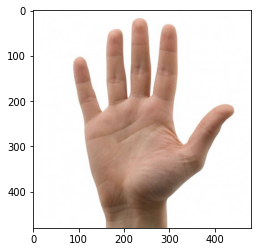

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/5.jpg')
imgplot=plt.imshow(img)
plt.show()

In [20]:
imgload=image.load_img('/content/drive/MyDrive/5.jpg',color_mode='grayscale',target_size=(64,64))
res=image.img_to_array(imgload)
res.shape


(64, 64, 1)

In [21]:
type(res)

numpy.ndarray

In [22]:
res=np.expand_dims(res,axis=0)
res.shape

(1, 64, 64, 1)

#Predict the result

In [23]:
pred_res=np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 117ms/step


array([5])

In [25]:
index=['0','1','2','3','4','5']
result=str(index[pred_res[0]])
result

'5'